In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [80]:
#fetch and load dataset for exploration
data_path = "dataset/heart.csv"
heart_df =pd.read_csv(data_path)
heart_df.head() #this should print the first 5 rows of the dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [81]:
heart_df.shape

(1025, 14)

In [82]:
heart_df.count()

age         1025
sex         1025
cp          1025
trestbps    1025
chol        1025
fbs         1025
restecg     1025
thalach     1025
exang       1025
oldpeak     1025
slope       1025
ca          1025
thal        1025
target      1025
dtype: int64

In [83]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [84]:
heart_df.info

<bound method DataFrame.info of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2

In [85]:
heart_df.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         age    sex     cp  trestbps   chol    fbs  restecg  thalach  exang  \
0     False  False  False     False  False  False    False    False  False   
1     False  False  False     False  False  False    False    False  False   
2     False  False  False     False  False  False    False    False  False   
3     False  False  False     False  False  False    False    False  False   
4     False  False  False     False  False  False    False    False  False   
...     ...    ...    ...       ...    ...    ...      ...      ...    ...   
1020  False  False  False     False  False  False    False    False  False   
1021  False  False  False     False  False  False    False    False  False   
1022  False  False  False     False  False  False    False    False  False   
1023  False  False  False     False  False  False    False    False  False   
1024  False  False  False     False  False  False    False    False  False   

 

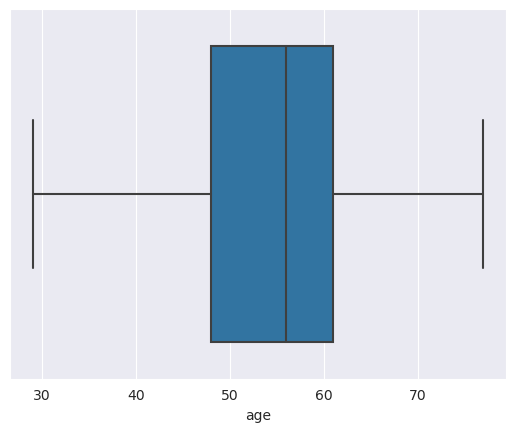

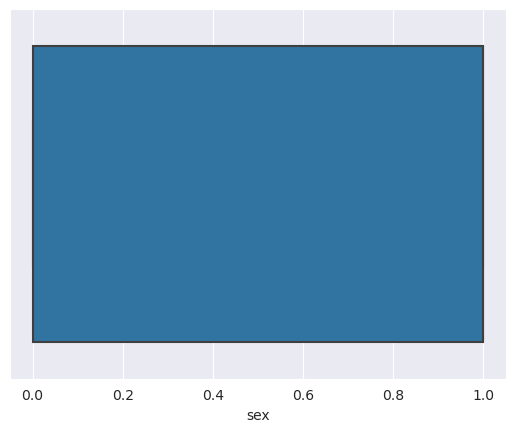

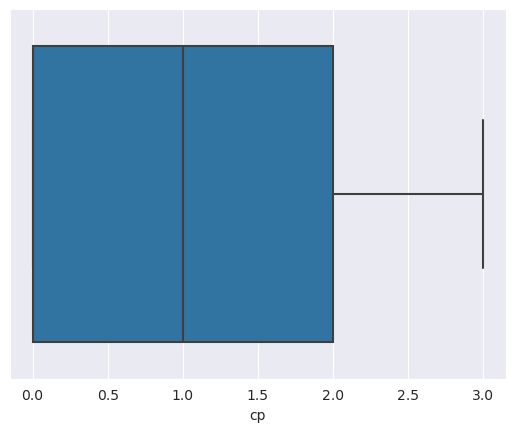

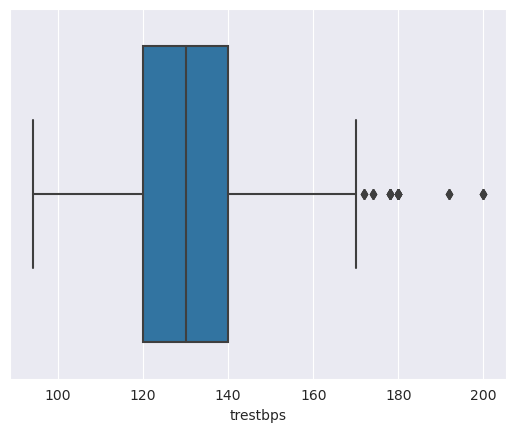

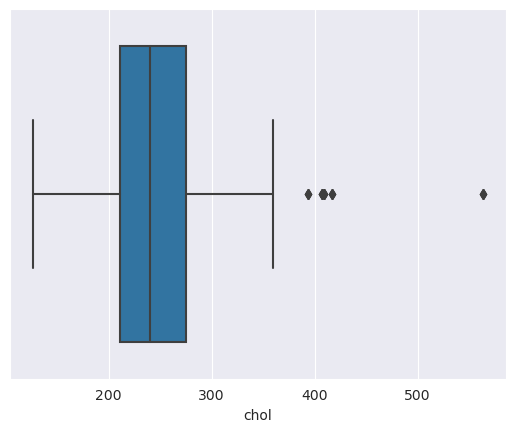

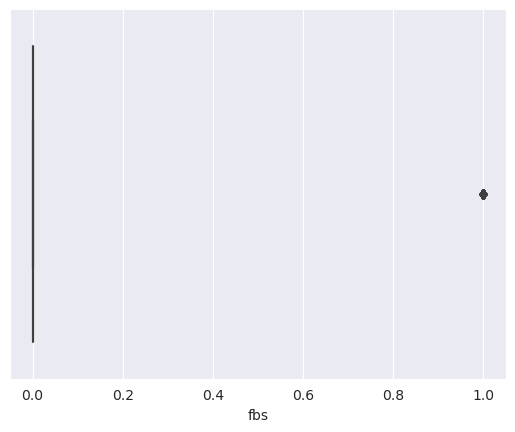

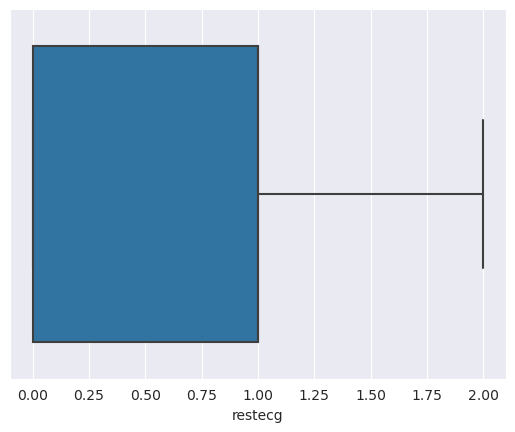

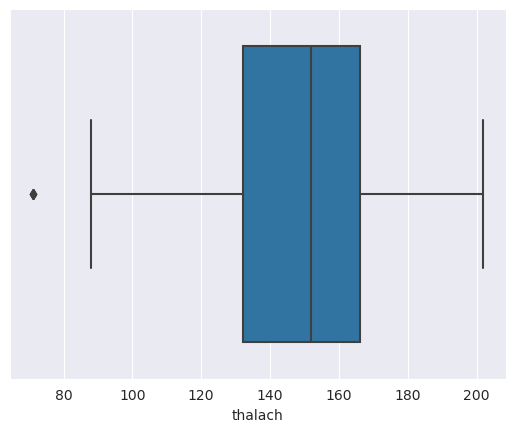

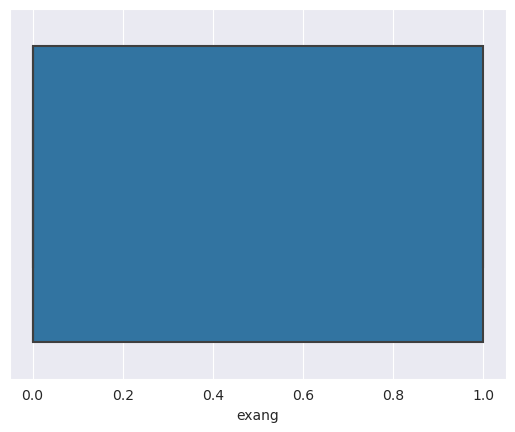

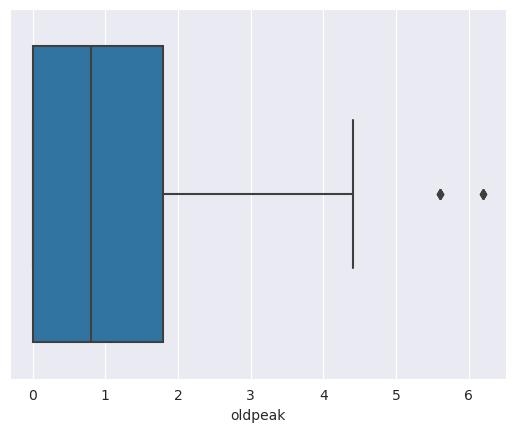

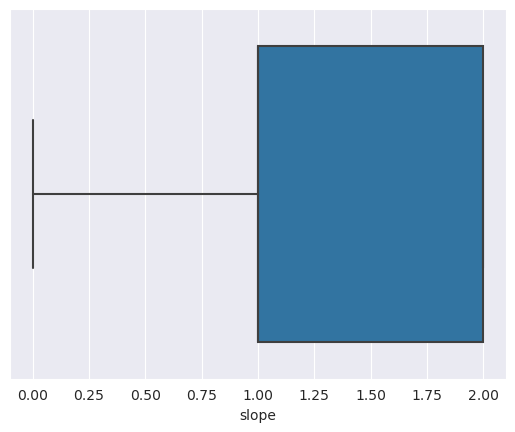

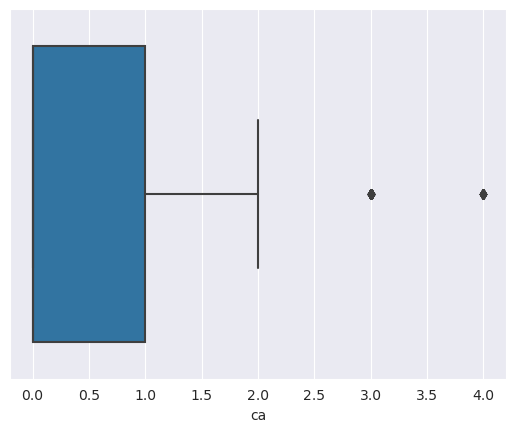

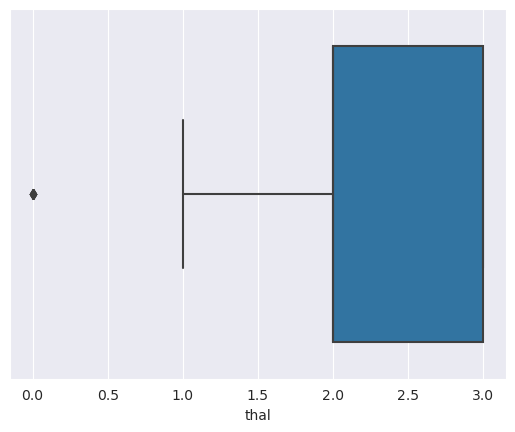

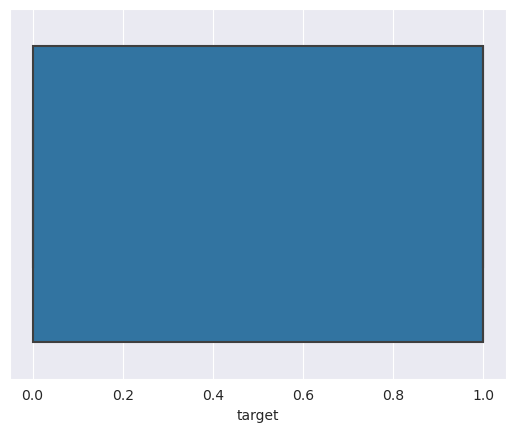

In [86]:
#box plot for all columns
for i in heart_df.columns:
    sns.boxplot(x = heart_df[i])
    plt.show()

In [87]:
#create a copy for visualization
heart_df_copy = heart_df.copy()

<Axes: xlabel='target', ylabel='count'>

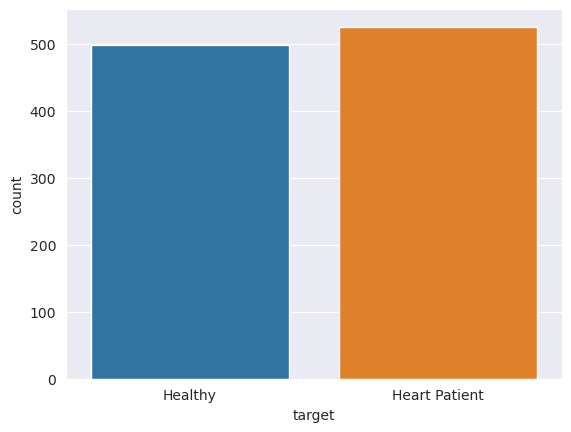

In [88]:
#comparing the number of healthy vs number of heart paients
heart_df_copy.target = heart_df_copy.target.map({0:'Healthy', 1:'Heart Patient'})
sns.countplot(x="target",data= heart_df_copy)

<Axes: xlabel='sex', ylabel='count'>

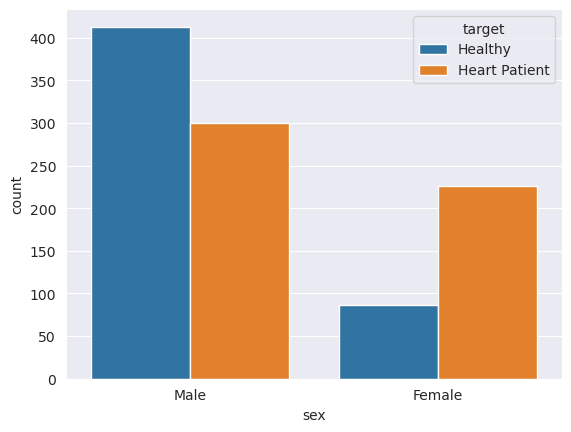

In [89]:
#comparing the number of healthy vs number of heart paients in male and female
heart_df_copy.sex = heart_df_copy.sex.map({0:'Female', 1:'Male'})
sns.countplot(x="sex",data= heart_df_copy, hue= heart_df_copy.target)

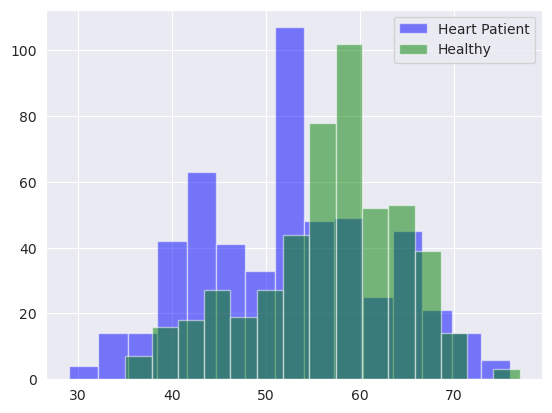

In [90]:
#compare age with health
plt.hist(heart_df_copy[heart_df_copy.target == 'Heart Patient']['age'],color='b',alpha = 0.5,bins=15,label='Heart Patient')
plt.hist(heart_df_copy[heart_df_copy.target == 'Healthy']['age'],color='g',alpha = 0.5,bins=15,label='Healthy')
plt.legend()
plt.show()

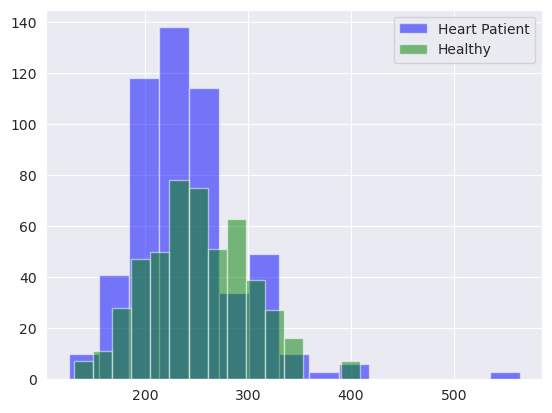

In [91]:
#compare cholesterol with health
plt.hist(heart_df_copy[heart_df_copy.target == 'Heart Patient']['chol'],color='b',alpha = 0.5,bins=15,label='Heart Patient')
plt.hist(heart_df_copy[heart_df_copy.target == 'Healthy']['chol'],color='g',alpha = 0.5,bins=15,label='Healthy')
plt.legend()
plt.show()

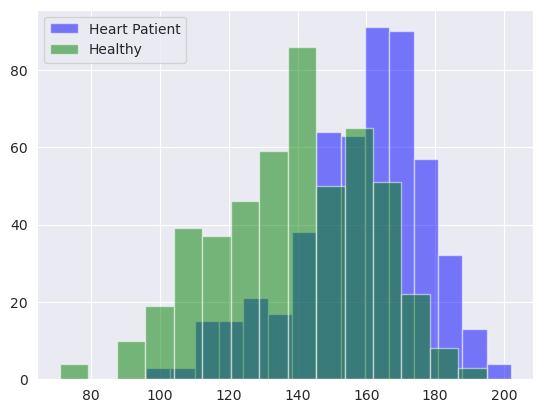

In [92]:
#compare heart rate with health
plt.hist(heart_df_copy[heart_df_copy.target == 'Heart Patient']['thalach'],color='b',alpha = 0.5,bins=15,label='Heart Patient')
plt.hist(heart_df_copy[heart_df_copy.target == 'Healthy']['thalach'],color='g',alpha = 0.5,bins=15,label='Healthy')
plt.legend()
plt.show()

In [93]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [94]:
heart_df.count()

age         1025
sex         1025
cp          1025
trestbps    1025
chol        1025
fbs         1025
restecg     1025
thalach     1025
exang       1025
oldpeak     1025
slope       1025
ca          1025
thal        1025
target      1025
dtype: int64

In [95]:
#split the dataset into input and output
X=heart_df.drop('target',axis=1) #this drops the target field from the dataframe since X is the input of the model
y=heart_df['target']# this takes only the target field since it's the required output of the model

In [96]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [97]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [98]:
#defining the sequential model
model = keras.Sequential() #gets an instance of the sequential model from keras

In [99]:
model.add(layers.Dense(13,activation='relu',input_dim=13))
model.add(layers.Dense(1,activation='sigmoid'))

In [100]:
#compile and fit the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X,y,validation_split=0.33,batch_size=20,epochs=300)

Epoch 1/300
 1/35 [..............................] - ETA: 22s - loss: 6.7490 - accuracy: 0.4500

2023-10-07 20:29:24.257727: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-07 20:29:24.390218: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-07 20:29:24.390297: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 1, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-07 20:29:24.390330: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 11897 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2023-10-07 20:29:24.390391: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

35/35 [==============================] - 2s 32ms/step - loss: 2.3278 - accuracy: 0.5700 - val_loss: 1.9372 - val_accuracy: 0.5339
Epoch 2/300


2023-10-07 20:29:25.314507: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-07 20:29:25.366959: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-07 20:29:25.367040: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 1, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-07 20:29:25.367089: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 11897 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2023-10-07 20:29:25.367117: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

35/35 [==============================] - 1s 23ms/step - loss: 1.3192 - accuracy: 0.6224 - val_loss: 1.4277 - val_accuracy: 0.6018
Epoch 3/300
35/35 [==============================] - 1s 23ms/step - loss: 1.1002 - accuracy: 0.6472 - val_loss: 1.1754 - val_accuracy: 0.6077
Epoch 4/300
35/35 [==============================] - 1s 24ms/step - loss: 0.9666 - accuracy: 0.6356 - val_loss: 1.0256 - val_accuracy: 0.6047
Epoch 5/300
35/35 [==============================] - 1s 25ms/step - loss: 0.8650 - accuracy: 0.6385 - val_loss: 0.8959 - val_accuracy: 0.6018
Epoch 6/300
35/35 [==============================] - 1s 25ms/step - loss: 0.7767 - accuracy: 0.6312 - val_loss: 0.8273 - val_accuracy: 0.5723
Epoch 7/300
35/35 [==============================] - 1s 24ms/step - loss: 0.7357 - accuracy: 0.6152 - val_loss: 0.7462 - val_accuracy: 0.6254
Epoch 8/300
35/35 [==============================] - 1s 24ms/step - loss: 0.6805 - accuracy: 0.6487 - val_loss: 0.7234 - val_accuracy: 0.6018
Epoch 9/300
35/35 

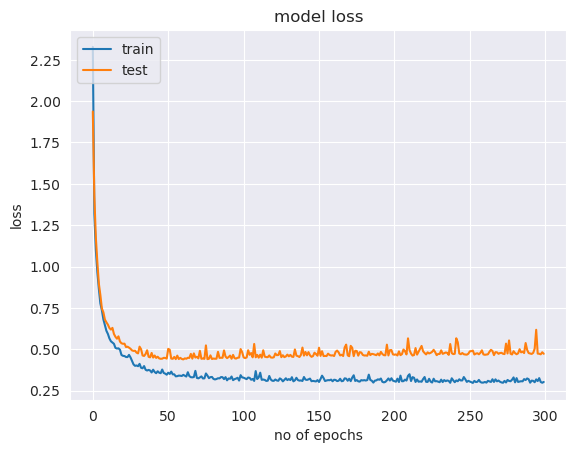

In [101]:
#plot loss vs epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train','test'], loc ='upper left')
plt.show()

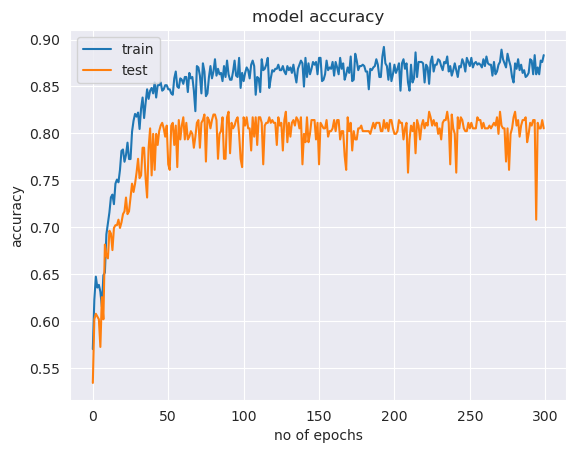

In [102]:
#plot accuracy vs epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('no of epochs')
plt.legend(['train','test'], loc ='upper left')
plt.show()

In [ ]:
#predicting heart disease
#will provide the 13 input features to the model
# will predict the probability as a number ranging between 0 and 1
#if it's above 0.5 it's a probability for a disease, else it's predicting a healthy person

In [108]:
#input for 13 features
#Xnew=np.array([[67,1,0,125,254,1,1,163,0,0.2,1,2,3]])
Xnew=np.array([[18,1,0,130,253,0,1,144,1,1.4,2,1,3]])
#convert into numpy array
Xnew= np.array(Xnew, dtype= np.float64)
"making the prediction"
Ynew= (model.predict(Xnew)>0.5).astype("int32")
print(Ynew[0])

1/1 [==============================] - 0s 30ms/step
[0]
